In [1]:
library(readr)
cars <- read_csv("cars04.csv")
# Load package
library(ggplot2)

Parsed with column specification:
cols(
  name = col_character(),
  sports_car = col_logical(),
  suv = col_logical(),
  wagon = col_logical(),
  minivan = col_logical(),
  pickup = col_logical(),
  all_wheel = col_logical(),
  rear_wheel = col_logical(),
  msrp = col_double(),
  dealer_cost = col_double(),
  eng_size = col_double(),
  ncyl = col_double(),
  horsepwr = col_double(),
  city_mpg = col_double(),
  hwy_mpg = col_double(),
  weight = col_double(),
  wheel_base = col_double(),
  length = col_double(),
  width = col_double()
)


In [2]:
# Learn data structure
str(cars)

Classes 'tbl_df', 'tbl' and 'data.frame':	428 obs. of  19 variables:
 $ name       : chr  "Chevrolet Aveo 4dr" "Chevrolet Aveo LS 4dr hatch" "Chevrolet Cavalier 2dr" "Chevrolet Cavalier 4dr" ...
 $ sports_car : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ suv        : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ wagon      : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ minivan    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ pickup     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ all_wheel  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ rear_wheel : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ msrp       : num  11690 12585 14610 14810 16385 ...
 $ dealer_cost: num  10965 11802 13697 13884 15357 ...
 $ eng_size   : num  1.6 1.6 2.2 2.2 2.2 2 2 2 2 2 ...
 $ ncyl       : num  4 4 4 4 4 4 4 4 4 4 ...
 $ horsepwr   : num  103 103 140 140 140 132 132 130 110 130 ...
 $ city_mpg   : num  28 28 26 26 26 29 29 26 27 26 ...
 $ hwy_mpg    : num  34 34 37 37 37 36 36

## BOXPLOT AND DENSITY PLOT

In [5]:
# Filter cars with 4, 6, 8 cylinders
library(dplyr)

common_cyl <- filter(cars, ncyl %in% c(4,6,8))

Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."

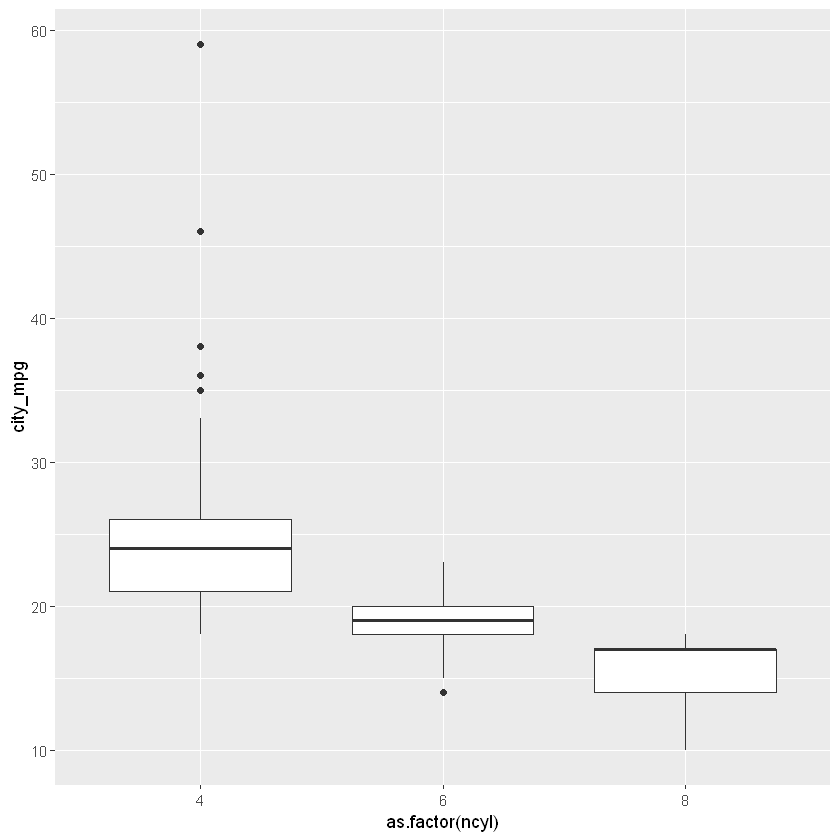

In [6]:
# Create box plots of city mpg by ncyl
ggplot(common_cyl, aes(x = as.factor(ncyl), y = city_mpg)) +
  geom_boxplot()

Warning message:
"Removed 11 rows containing non-finite values (stat_density)."

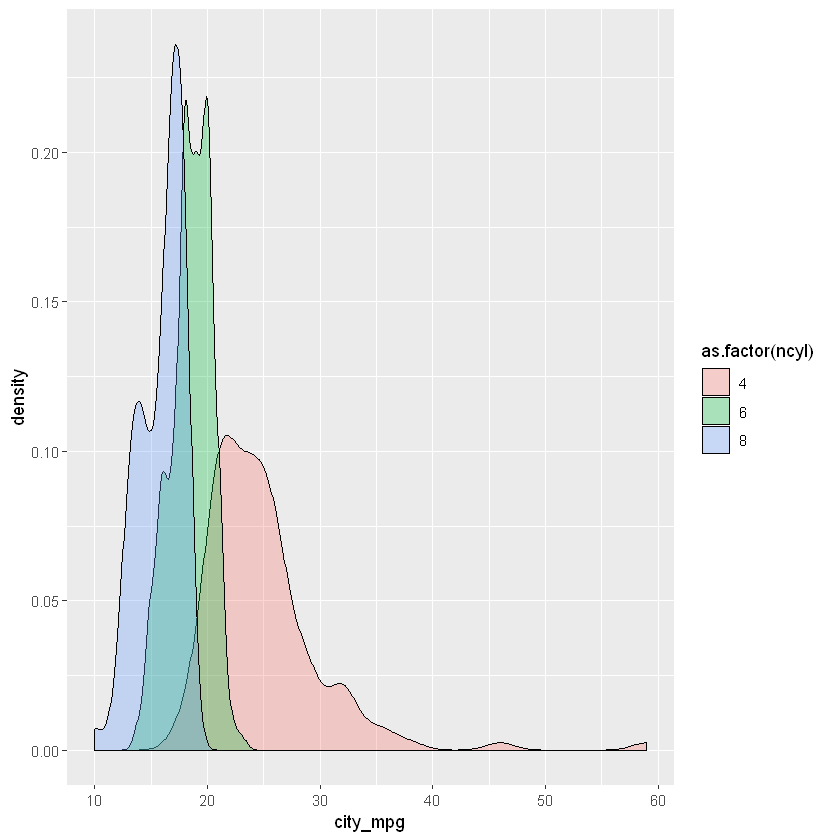

In [7]:
# Create overlaid density plots for same data
ggplot(common_cyl, aes(x = city_mpg, fill = as.factor(ncyl))) +
  geom_density(alpha = .3)

## MARGINAL AND CONDITIONAL HISTOGRAMS

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


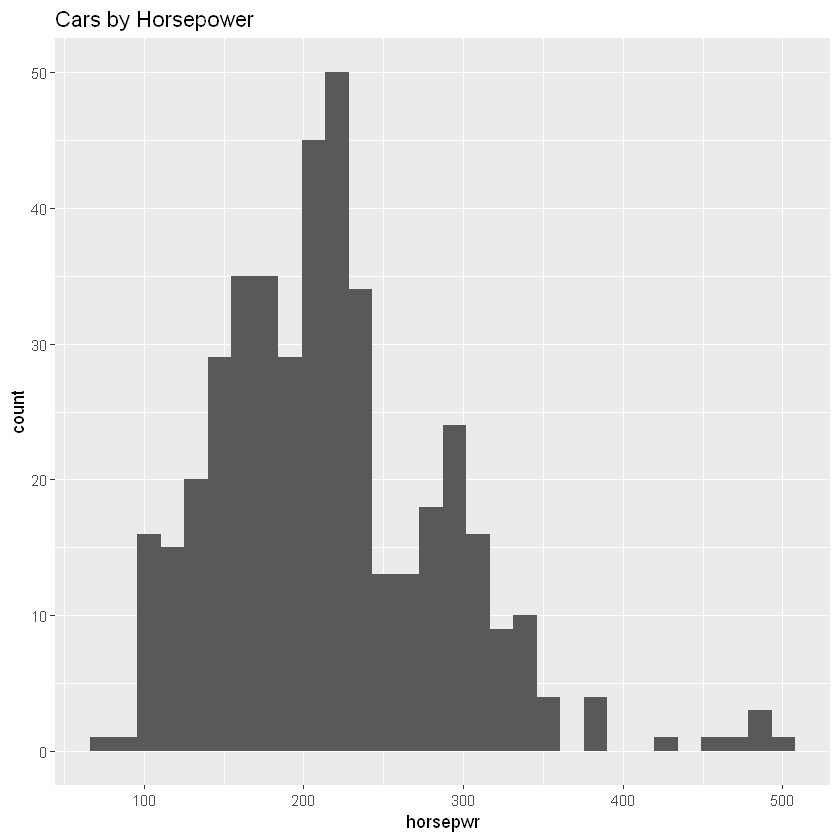

In [8]:
# Create hist of horsepwr
cars %>%
  ggplot(aes(horsepwr)) +
  geom_histogram() +
  ggtitle("Cars by Horsepower")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

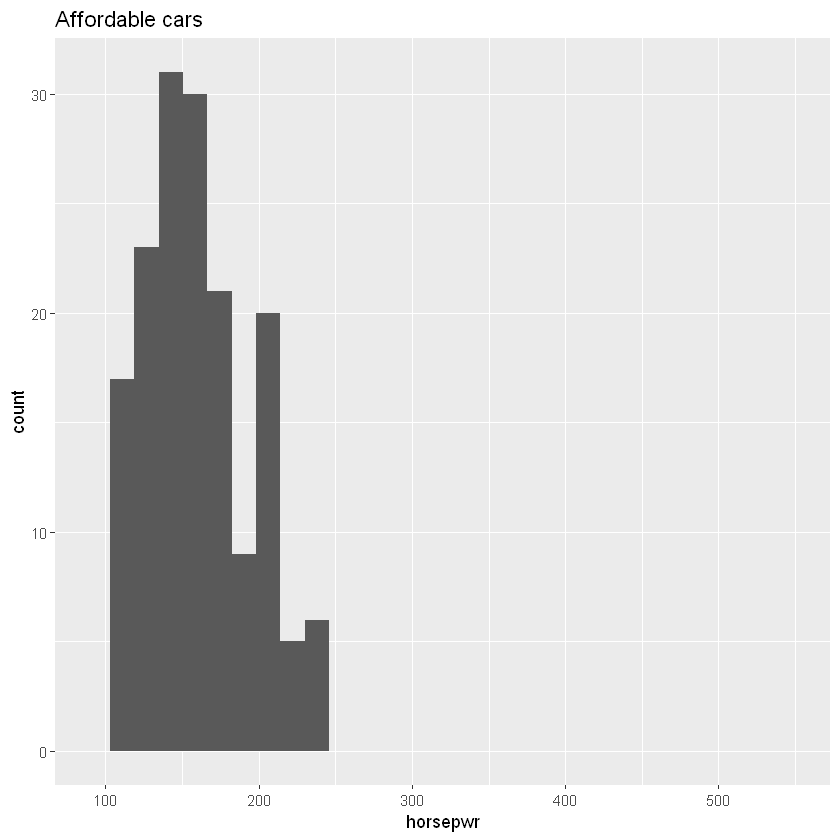

In [9]:
# Create hist of horsepwr for affordable cars
cars %>% 
  filter(msrp < 25000) %>%
  ggplot(aes(horsepwr)) +
  geom_histogram() +
  xlim(c(90, 550)) +
  ggtitle("Affordable cars")

## BINWIDTH

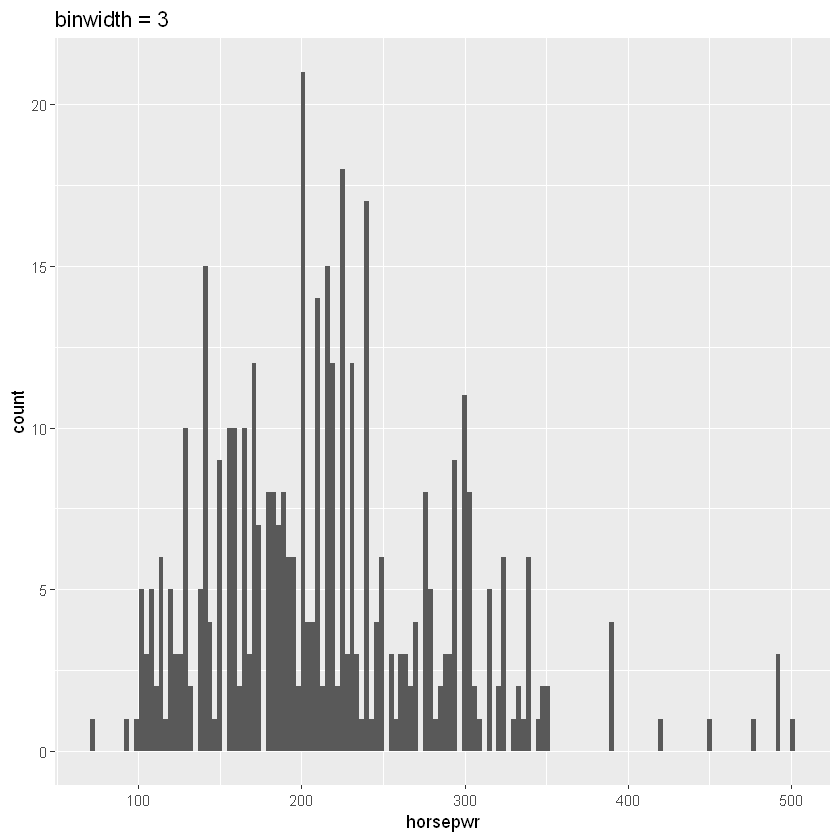

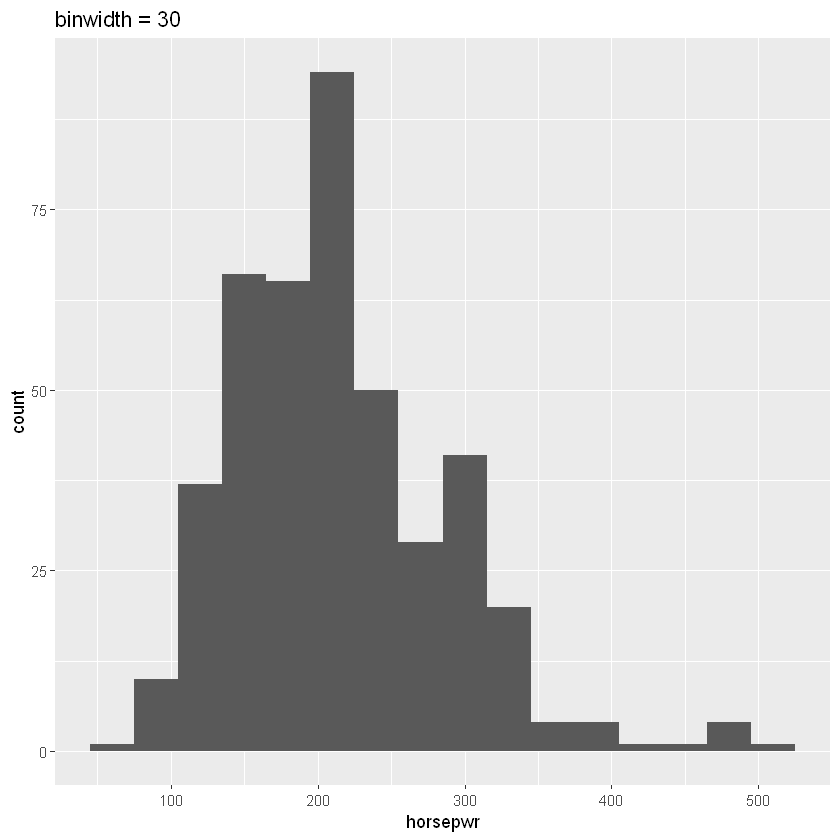

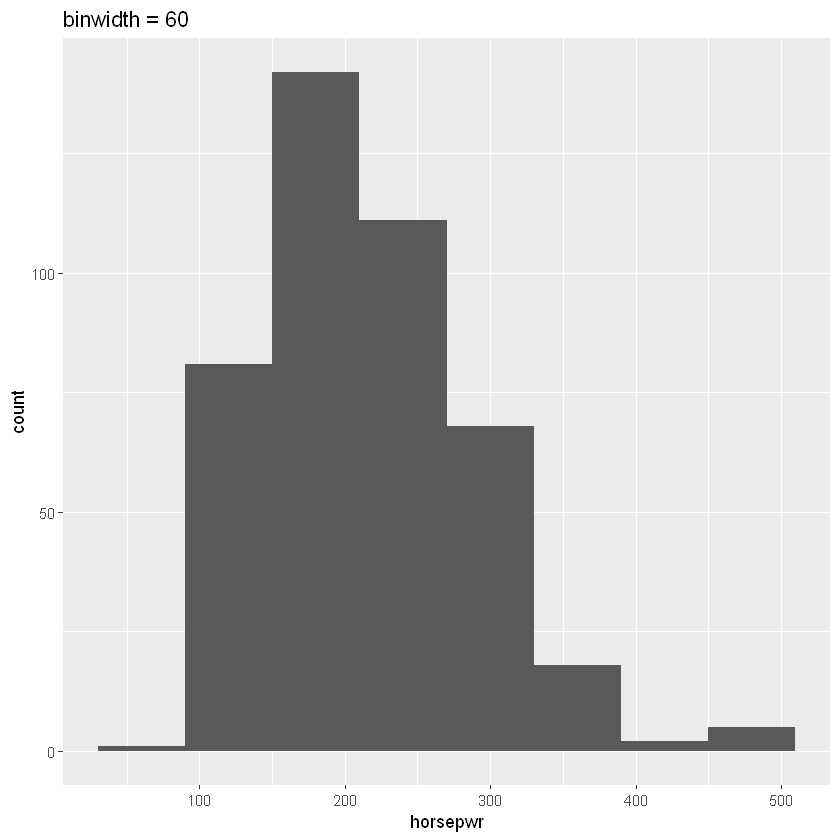

In [12]:
# Create hist of horsepwr with binwidth of 3
cars %>%
  ggplot(aes(horsepwr)) +
  geom_histogram(binwidth = 3) +
  ggtitle("binwidth = 3")

# Create hist of horsepwr with binwidth of 30
cars %>% 
  ggplot(aes(horsepwr)) +
  geom_histogram(binwidth = 30) +
  ggtitle("binwidth = 30")

# Create hist of horsepwr with binwidth of 60
cars %>%
  ggplot(aes(horsepwr)) +
  geom_histogram(binwidth = 60) +
  ggtitle("binwidth = 60")

## BOXPLOT FOR OUTLIER

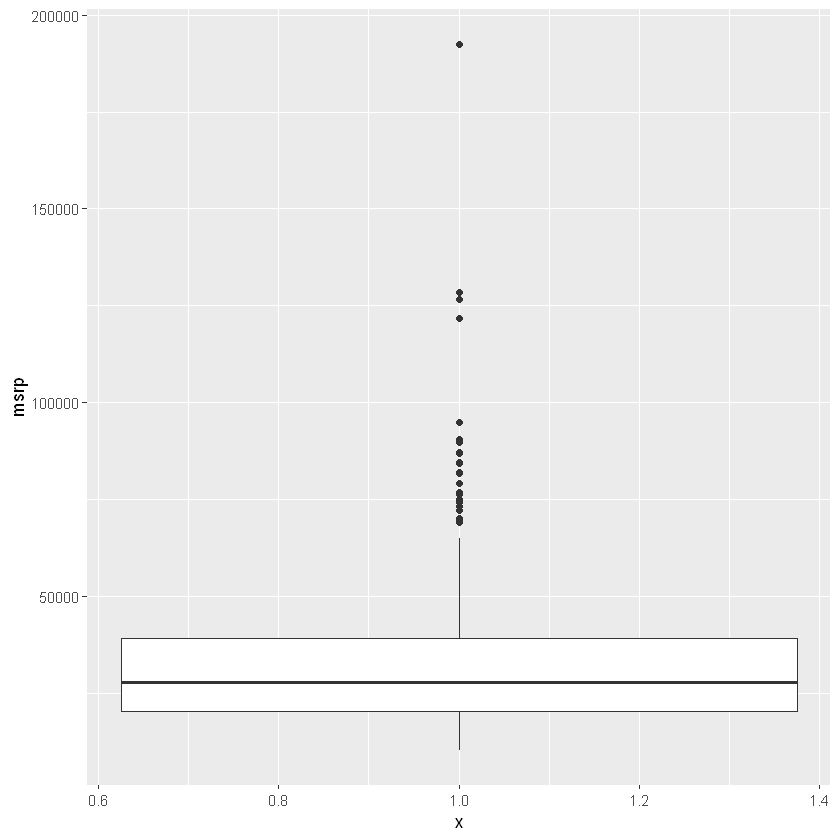

In [13]:
# Construct box plot of msrp
cars %>%
  ggplot(aes(x = 1, y = msrp)) +
  geom_boxplot()

In [14]:
# Exclude outliers from data
cars_no_out <- cars %>%
  filter(msrp < 100000)

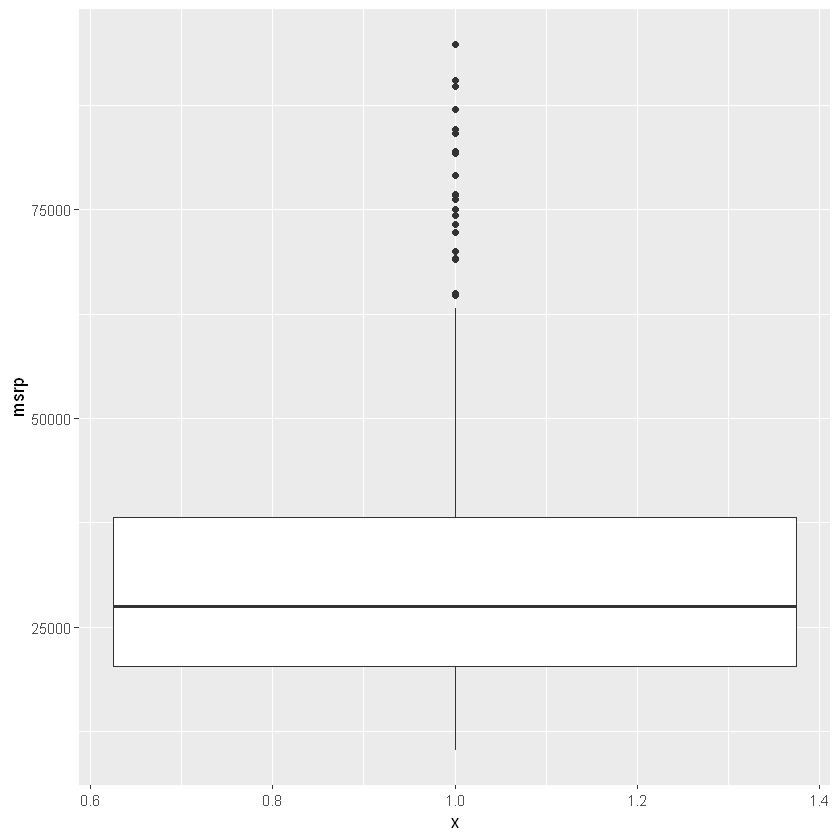

In [15]:
# Construct box plot of msrp using the reduced dataset
cars_no_out %>%
  ggplot(aes(x = 1, y = msrp)) +
  geom_boxplot()

## FACETED PLOT

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 11 rows containing non-finite values (stat_bin)."

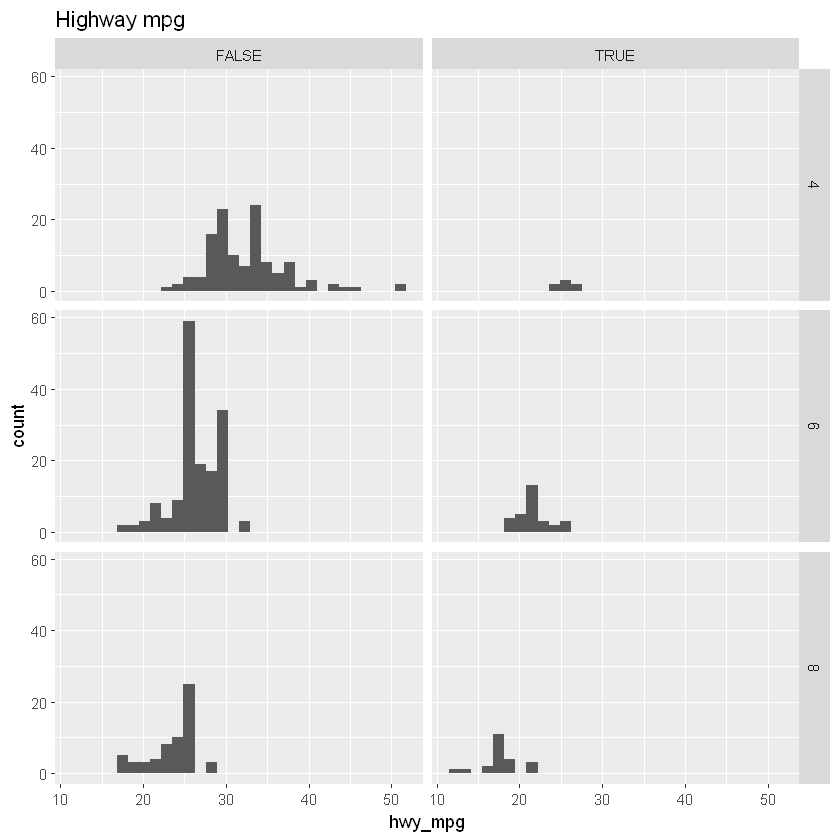

In [16]:
# Facet hists using hwy mileage and ncyl
common_cyl %>%
  ggplot(aes(x = hwy_mpg)) +
  geom_histogram() +
  facet_grid(ncyl ~ suv) +
  ggtitle("Highway mpg")

Across both SUVs and non-SUVs, mileage tends to decrease as the number of cylinders increases.